In [1]:
import re, time, warnings, os, sys, copy
import gzip, pickle

import numpy as np
import pandas as pd
import gzip, pickle
import scipy, sklearn, mne

import auxiliary as aux
import data, rsa
sys.path.append('../spaces/')
import embeddings as emb
import pubplot as pub
import matplotlib.pyplot as plt

pub.styles.set()
C = pub.colours.equidistant('tab20c', k = 20)

## Supplementary Figure 2, Table 3
This notebook produces supplementary results for stimulus reconstruction analysis.

In [24]:
from subject_rsa_rec import load_eeg
from inference_rsa_rec import _plot_topo_inlay
from subject_rerp_mt1 import load_annotation

# load reconstruction data
with gzip.open(f'./data/results/reconstruction.pkl.gz', 'rb') as f:
    r, p, rec = pickle.load(f)

_, info = load_eeg(f'./data/preprocessed/eeg/sub0002/rsa-MT1-epo.fif', fs = 200)

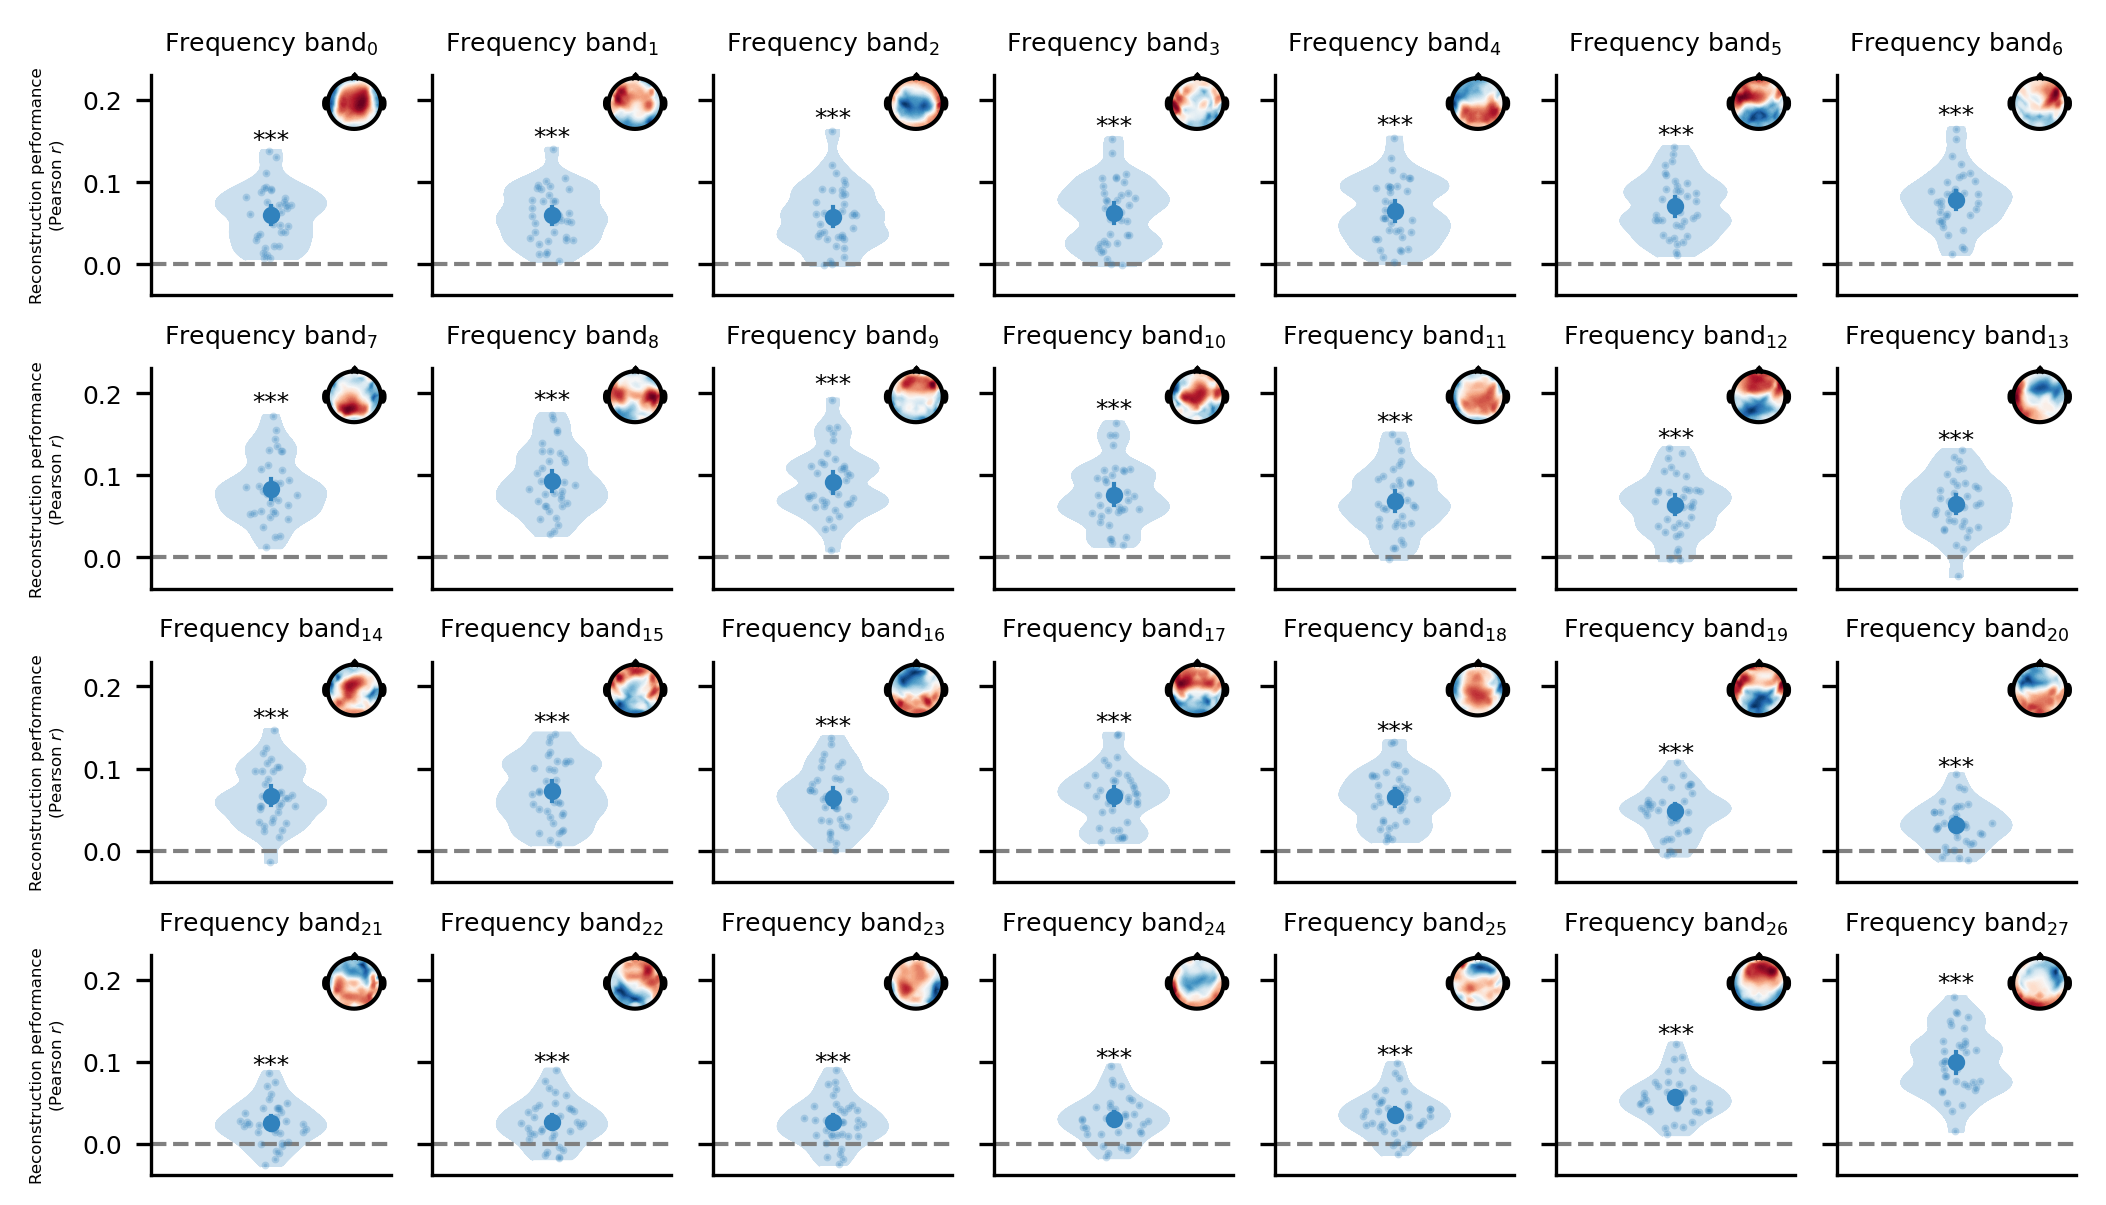

In [30]:
'''
Create figure 2
'''

fig, ax = pub.figure(nrows = 4, ncols = 7, sharex = True, sharey = True, figsize = (7.0, 4.0))

bw = pub.dist._bandwidth_botev(r.flatten())

absmax = r.max()
absmin = r.min()

for i in range(28):
    j, k = i // 7, i %  7
    
    r_i = rec[i]
    
    ax[j,k].plot([-1, 1], [0, 0], color = 'gray', linestyle = '--')
    pub.dist.violins(r[:,i], jitter = True, jitter_max = 1.75 * bw, colours = [C[0]], kernel_bandwidth = bw, ax = ax[j,k])
    maxval = r[:,i].max()
    
    ax[j,k].annotate(pub.significance.__sig_from_p(r_i['p_cor']), xy = (0, 1.1 * maxval), xytext = (0, 1.1 * maxval), ha = 'center', va = 'center', annotation_clip = False)
    ax[j,k].set_ylim([1.5 * absmin, 1.2 * absmax])
    ax[j,k].set_xlim([-1, 1])
    ax[j,k].set_xticks([])
    ax[j,k].set_title(fr'Frequency band$_{{{i}}}$', fontsize = 6)
    if k == 0: ax[j,k].set_ylabel('Reconstruction performance\n' + r'(Pearson $r$)', fontsize = 4)
    
    ax_topo = ax[j,k].inset_axes([0.7, 0.7, 0.3, 0.3]); ax_topo.axis('off')
    _plot_topo_inlay(p[:,i,:,:].mean(axis = (0, 2)), info, sensors = False, ax = ax_topo)
    
pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig2_rec.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig2_rec.svg')
fig.savefig(f'./figures/pdf/suppfig2_rec.pdf')

In [34]:
'''
Create table 3
'''

band = np.arange(28)
mu = np.zeros((28,))
sd = np.zeros((28,))
df = np.ones((28,)).astype(int) * 34
t = np.ones((28,))
p = np.ones((28,))

for i in range(28):
    r_i = rec[i]
    
    mu[i] = np.round(r_i['mu'], 2)
    sd[i] = np.round(r_i['sd'], 2)
    t[i] = np.round(r_i['t'], 2)
    p[i] = r_i['p_cor']

table = {'Frequency band': band, 'M': mu, 'Std. Dev.': sd, 'df': df, 't-value': t, 'p-value': p}
table = pd.DataFrame.from_dict(table)
print(table.to_latex(index = False))

\begin{tabular}{rrrrrr}
\toprule
 Frequency band &    M &  Std. Dev. &  df &  t-value &      p-value \\
\midrule
              0 & 0.06 &       0.03 &  34 &    10.56 & 3.151979e-11 \\
              1 & 0.06 &       0.03 &  34 &    11.03 & 1.352901e-11 \\
              2 & 0.06 &       0.04 &  34 &     9.30 & 5.005196e-10 \\
              3 & 0.06 &       0.04 &  34 &     9.45 & 3.847424e-10 \\
              4 & 0.06 &       0.04 &  34 &    10.13 & 7.584404e-11 \\
              5 & 0.07 &       0.03 &  34 &    12.00 & 1.983854e-12 \\
              6 & 0.08 &       0.03 &  34 &    13.22 & 1.423830e-13 \\
              7 & 0.08 &       0.04 &  34 &    12.86 & 2.992608e-13 \\
              8 & 0.09 &       0.04 &  34 &    14.33 & 1.534314e-14 \\
              9 & 0.09 &       0.04 &  34 &    13.60 & 6.844391e-14 \\
             10 & 0.08 &       0.04 &  34 &    11.84 & 2.616005e-12 \\
             11 & 0.07 &       0.04 &  34 &    10.90 & 1.581847e-11 \\
             12 & 0.06 &       0.03

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_63849/2610309206.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(index = False))
